


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [3]:
# Importe as bibliotecas
import pandas as pd

In [4]:
# leia os conjuntos de dados em DataFrames
cart = pd.read_csv('datasets/instacart_orders.csv', sep=";")
products = pd.read_csv('datasets/products.csv', sep=";")
aisles = pd.read_csv('datasets/aisles.csv', sep=";")
departments = pd.read_csv('datasets/departments.csv', sep=";")
order = pd.read_csv('datasets/order_products.csv', sep=";")

In [5]:
# imprima as informações sobre o DataFrame
cart.info()
print(cart.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
<bound method NDFrame.head of         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        300

In [6]:
# imprima as informações sobre o DataFrame
products.info()
print(products.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<bound method NDFrame.head of        product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFOR

In [7]:
# imprima as informações sobre o DataFrame
departments.info()
print(departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [8]:
# imprima as informações sobre o DataFrame
order.info()
print(order.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
<bound method NDFrame.head of          order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319

In [9]:
# imprima as informações sobre o DataFrame
aisles.info()
print(aisles.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
<bound method NDFrame.head of      aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]>


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [10]:
# Verificar se há pedidos duplicados
print(cart[cart.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Há linhas duplicadas? Se sim, o que elas têm em comum?

Sim, todos os valores duplicados tem as colunas 'order_dow' e 'order_hour_of_day' com os mesmos valores

In [11]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
print(cart[(cart['order_hour_of_day']==2)&(cart['order_dow']==3)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

O que esse resultado quer dizer?

Algumas das compras realizadas nesse horario foram duplicadas mas não todas 

In [12]:
# Remova pedidos duplicados
cart = cart.drop_duplicates()

In [13]:
# Verifique as linhas duplicadas mais uma vez
print(cart.duplicated().sum())

0


In [14]:
# Verifique novamente apenas os IDs de pedidos duplicados
print(cart[cart['order_id'].duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []




Descreva brevemente suas conclusões e o que você fez com elas.

algumas compras realizadas dentro de um periodo especifico de tempo foram duplicadas, podemos verificar baseado no dia/hora que o pedido foi realizado, estes foram removidos

### DataFrame `products`

In [15]:
# Verifique se há linhas completamente duplicadas
print(products.duplicated().sum())

0


In [16]:
# Verifique apenas IDs dos produtos duplicados
print(products[products['product_id'].duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [17]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
print(products[products['product_name'].str.lower().duplicated()])

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [18]:
# Verifique os nomes de produtos duplicados que não estão faltando
print(products[(products['product_name'].str.lower().duplicated())&(~products['product_name'].isna())])

       product_id                                     product_name  aisle_id  \
2058         2059                                  Biotin 1000 Mcg        47   
5455         5456                 Green Tea With Ginseng and Honey        96   
5558         5559                           Cream Of Mushroom Soup        69   
7558         7559                        Cinnamon Rolls with Icing       105   
9037         9038                           American Cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Descreva brevemente suas conclusões e o que você fez com elas.

existem 104 produtos duplicados e uma grande quantidade de produtos sem nome

### DataFrame `departments`

In [19]:
# Verifique se há linhas completamente duplicadas
print(departments.duplicated().sum())

0


In [20]:
# Verifique apenas se há IDs dos produtos duplicados
print(departments['department_id'].duplicated().sum())
print(departments['department_id'].value_counts())

0
department_id
1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: count, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Não existem departamentos repetidos na tabela baseado nos ids

### DataFrame `aisles`

In [21]:
# Verifique se há linhas completamente duplicadas
print(aisles.duplicated().sum())

0


In [22]:
# Verifique apenas se há IDs dos produtos duplicados
print(aisles['aisle_id'].duplicated().sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.

não ha duplicados

### DataFrame `order_products`

In [23]:
# Verifique se há linhas completamente duplicadas
print(order.duplicated().sum())

0


In [24]:
# Verifique mais uma vez se há outros casos complicados de duplicados
print(order['order_id'].duplicated().sum())
print(order.value_counts())

4094961
order_id  product_id  add_to_cart_order  reordered
4         10054       5.0                1            1
2277733   35233       5.0                1            1
2277734   15233       4.0                1            1
          11471       2.0                1            1
          6374        3.0                1            1
                                                     ..
1145037   26790       21.0               1            1
          27767       10.0               1            1
          32086       16.0               0            1
          33572       5.0                1            1
3421079   30136       1.0                0            1
Name: count, Length: 4544171, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

A tabela de order_products esta correta uma vez que podem ser adicionados varios produtos a o mesmo pedido

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [25]:
# Encontre valores ausentes na coluna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.

In [26]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
print(products[(products['product_name'].isna()) & (products['aisle_id']==100)])
print(products[products['aisle_id']==100])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417      

Descreva brevemente suas conclusões.

algo aconteceu onde os produtos do corredor 100 perderam seu nome

In [27]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

print(products[(products['product_name'].isna()) & (products['department_id']==21)])
print(products[products['department_id']==21])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417      

Descreva brevemente suas conclusões.

e o mesmo pode ser dito para o departamento 21

In [28]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
print(departments[departments['department_id']==21])
print(aisles[aisles['aisle_id']==100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Descreva brevemente suas conclusões.

esse departamento e esse corredor possivelmente deixaram de existir ou foram cadastrados dessa maneira

In [29]:
# Preencha nomes de produtos ausentes com 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products[products['department_id']==21])

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões e o que você fez com elas.

Localizei os itens que ewstavam vazios e utilizei o metodo "fillna" para subistituir Nan por "Unknown"

### DataFrame `orders`

In [30]:
# Encontre os valores ausentes
print(cart[cart.isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0            NaN      NaN           NaN        NaN                NaN   
1            NaN      NaN           NaN        NaN                NaN   
2            NaN      NaN           NaN        NaN                NaN   
3            NaN      NaN           NaN        NaN                NaN   
4            NaN      NaN           NaN        NaN                NaN   
...          ...      ...           ...        ...                ...   
478962       NaN      NaN           NaN        NaN                NaN   
478963       NaN      NaN           NaN        NaN                NaN   
478964       NaN      NaN           NaN        NaN                NaN   
478965       NaN      NaN           NaN        NaN                NaN   
478966       NaN      NaN           NaN        NaN                NaN   

        days_since_prior_order  
0                          NaN  
1                          NaN  
2                       

In [31]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
print(cart[cart['order_number']!=1].isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [32]:
# Encontre os valores ausentes
order.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
# Quais são os valores mínimo e máximo dessa coluna?
print(order['add_to_cart_order'].min())
print(order['add_to_cart_order'].max())

1.0
64.0


Descreva brevemente suas conclusões.

In [34]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
val_ausente = order[order['add_to_cart_order'].isna()]['order_id']
print(val_ausente)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [35]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem


#print(order.groupby('order_id')['product_id'].count().min())

print(order[order['order_id'].isin(val_ausente)].groupby('order_id')['product_id'].count().min())

65


Descreva brevemente suas conclusões.

sim todos os pedidos com valores ausentes contem mais de 64 produtos

In [36]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
order['add_to_cart_order']=order['add_to_cart_order'].fillna(999)
order.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Descreva brevemente suas conclusões e o que você fez com elas.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [37]:
cart['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64

In [38]:
cart['order_dow'].value_counts().sort_index()

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64

Escreva suas conclusões aqui

os valores estão corretos

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

<Axes: xlabel='order_hour_of_day'>

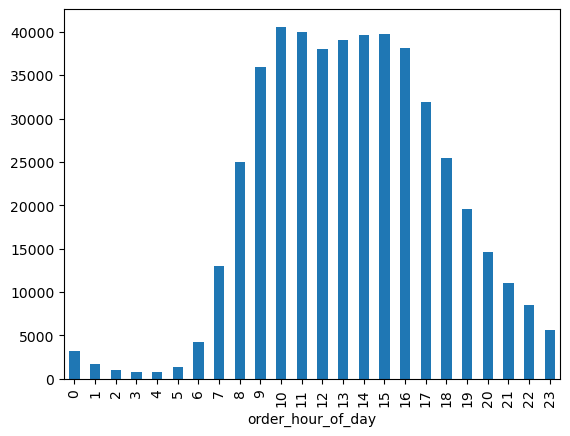

In [39]:
cart.groupby('order_hour_of_day')['order_id'].count().plot(kind='bar')

Escreva suas conclusões aqui

os pedidos tem um aumento brusco a partir das 6, atingindo seu maior volume entre 10 e 15, e voltam a reduzer apos as 15 de maneira mais gradual 

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

<Axes: xlabel='order_dow'>

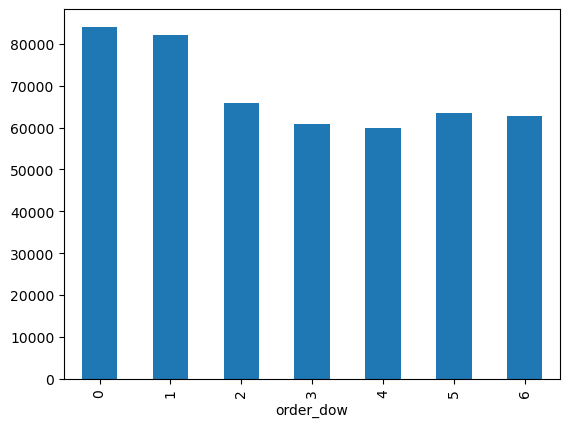

In [40]:
cart.groupby('order_dow')['order_id'].count().plot(kind='bar')

Escreva suas conclusões aqui

há um volume de compras maior no domingo e na segunda

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

<Axes: xlabel='days_since_prior_order'>

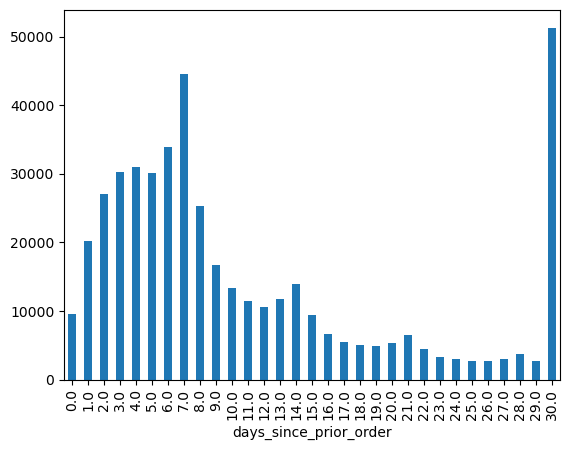

In [41]:
cart.groupby('days_since_prior_order')['order_id'].count().plot(kind="bar")

uma grande quantidade de pessoas realiza o pedido novamente entre 1 e 7 dias, porem 7 e 30 dias apos a o pedido anterior se destacam no grafico com a maior quantidade de pessoas realizando pedidos apos 7 e 30 dias

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

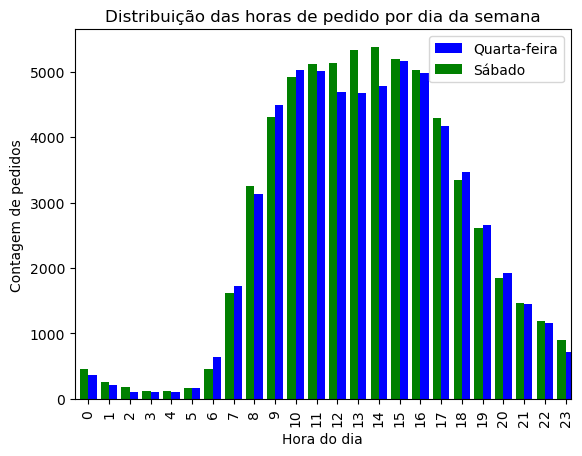

In [42]:
import matplotlib.pyplot as plt

# Filtra os dados
wednesday_orders = cart[cart['order_dow'] == 3]['order_hour_of_day']
saturday_orders = cart[cart['order_dow'] == 6]['order_hour_of_day']

# Conta a frequência das horas de pedido
wednesday_counts = wednesday_orders.value_counts().sort_index()
saturday_counts = saturday_orders.value_counts().sort_index()

# Configura as cores
colors = ['blue', 'green']

# Cria a figura e os eixos
fig, ax = plt.subplots()

# Plota os dados
wednesday_counts.plot(kind='bar', ax=ax, color=colors[0], position=0, width=0.4, label='Quarta-feira')
saturday_counts.plot(kind='bar', ax=ax, color=colors[1], position=1, width=0.4, label='Sábado')

# Adiciona a legenda
ax.legend()

# Adiciona títulos e rótulos
ax.set_title('Distribuição das horas de pedido por dia da semana')
ax.set_xlabel('Hora do dia')
ax.set_ylabel('Contagem de pedidos')

# Mostra o gráfico
plt.show()

Escreva suas conclusões aqui

Não ha uma grande diferença na quantidade  de pedidos entre quata e sabado, com exceção das 12 até as 14 onde sabado tem uma quantidade visivelmente maior de pedidos relizados

### [B2] Qual é a distribuição do número de pedidos por cliente?

<Axes: >

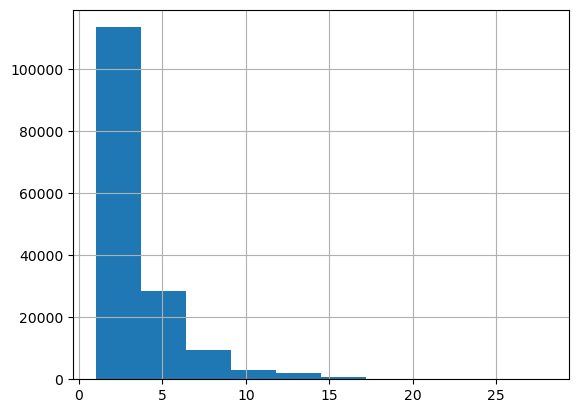

In [ ]:
cart.groupby('user_id')['order_id'].count().hist()

Escreva suas conclusões aqui

a maior parte dos clientes realiza menos de 5 pedidos

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [ ]:
merge = order.merge(products, on='product_id')
print(merge.groupby(['product_id','product_name'])['product_name'].count().sort_values(ascending=False).head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: product_name, dtype: int64


Escreva suas conclusões aqui

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

<Axes: >

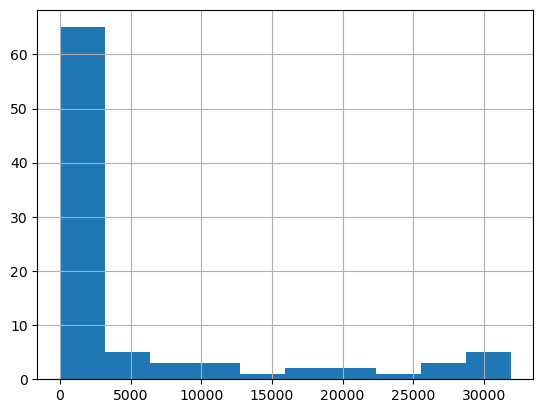

In [ ]:
order.groupby(['order_id'])['product_id'].count().value_counts().hist()

Escreva suas conclusões aqui

a maior parte dos pedidos teram menos de 10 produtos, porem alguns chegaram até mais de 60

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [ ]:
merge = order[order['reordered']==1].merge(products, on='product_id')
print(merge.groupby(['product_id','product_name'])['product_name'].count().sort_values(ascending=False).head(20))

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: product_name, dtype: int64
